# Algorithme de la racine carrée

Ce programme est la suite d'une réflexion que j'ai eu dans le cadre d'une activité avec le groupe TEMA dans laquelle nous avons réfléchie sur l'algorithme de la racine carrée telle que proposée par Théon d'Alexandrie. Après avoir analysé cet algorithme, j'ai tenté de l'implémenter. Cette implémentation a fait émerger plusieurs autres questionnements dont certains que je tenterai de mettre en lumière. 

Dans ce notebook, je présente une version "propre" du travail que j'ai fait en m'appuyant sur une présentation faite au GDM avec Mireille Saboya et Eva Knoll.

In [4]:
from math import *

In [5]:
n=input("choisir un nombre entier positif supérieur à 0 et je retournerai la racine carré de ce nombre: ")

racine_temporaire=0 #la valeur finale de la racine sera enregistrée ici (initialisation)
n_rempli=0 #portion du carré déjà considéré (initialisation)
reste=0

choisir un nombre entier positif supérieur à 0 et je retournerai la racine carré de ce nombre: 122345


### Déterminer le nombre de chiffres de la racine carrée

Pour détailler les réflexions, je m'appuierai sur l'exemple du calcul de la racine carrée du nombre 62 331 025.

Lorsque nous calculons la racine carrée à la main, nous commençions par faire des paquets de deux avec le nombre.

$$ 62'33'1 0'25 $$

Nous faisions ces paquets de deux puisqu'un nombre au carré peut au maximum être égal à 81 (9*9). Or, en faisant ces paquets de deux, on pouvait aussi déterminer le nombre de chiffres que contiendra notre solution (si elle est entière ou si on arrondi à une réponse entière). 

J'ai donc repris cette idée pour l'implémentation pour savoir combien de chiffres il y aurait dans la solution. Toutefois dans l'algorithme informatique, il a aussi fallu tenir compte de la parité du nombre de chiffres de la solution. Par exemple, si $n=12'34'56$ et si $n=1'23'45$, il est nécessaire que le nombre de paquets de deux soit égale à trois (comme si pour le second nombre il y avait un zéro au début $n=01'23'45$).

In [6]:
#longueur du nombre choisi
longueur_n=len(n) 

#nombre de paquets de deux chiffres dans le nombre (donc le nomre de chiffres de la racine)
paquets_deux=int(ceil(longueur_n/2))

### Déterminer la racine carrée

Pour calculer la racine carrée avec l'algorithme papier-crayon, nous commençions par déterminer le premier nombre en se posant la question: Quel nombre entier multiplié par lui-même s'approche le plus possible de 62 331 025 sans le dépasser?

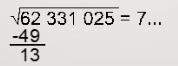

Ainsi, quand on cherche la racine carrée d'un nombre, c'est comme si on cherchait le côté d'un carré dont l'aire est ce nombre.

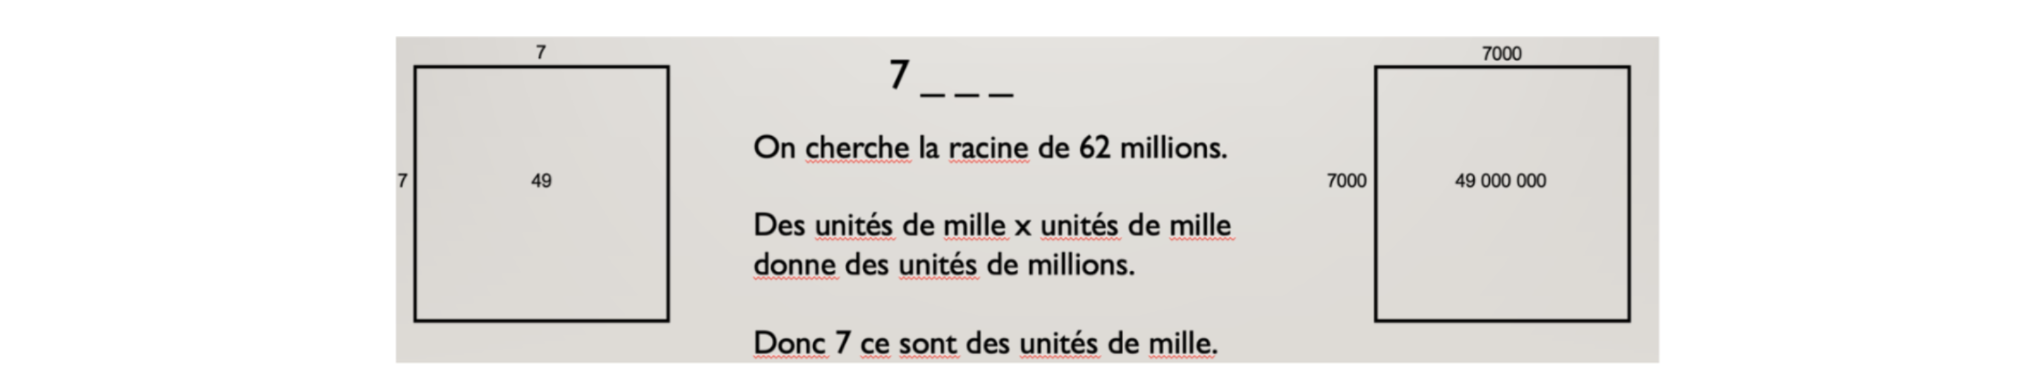

Lorsque j'ai voulu implémenter l'algorithme, j'ai d'abord dû trouver une manière de tester systématiquement les nombres. J'ai donc choisi de commencer par 9 (qui est le chiffre le plus grand qui puisse être utilisé). Ensuite, je teste 8, 7, ... jusqu'à ce que le carré soit inférieur. Or, je devais avoir un nombre de comparaison qui est le nombre entré initialement (celui dont on veut la racine). Par conséquent, j'ai utilisé le nombre de chiffre de mon nombre pour savoir que je cherchais le premier chiffre à gauche (qui représente les unités de mille dans cet exemple).

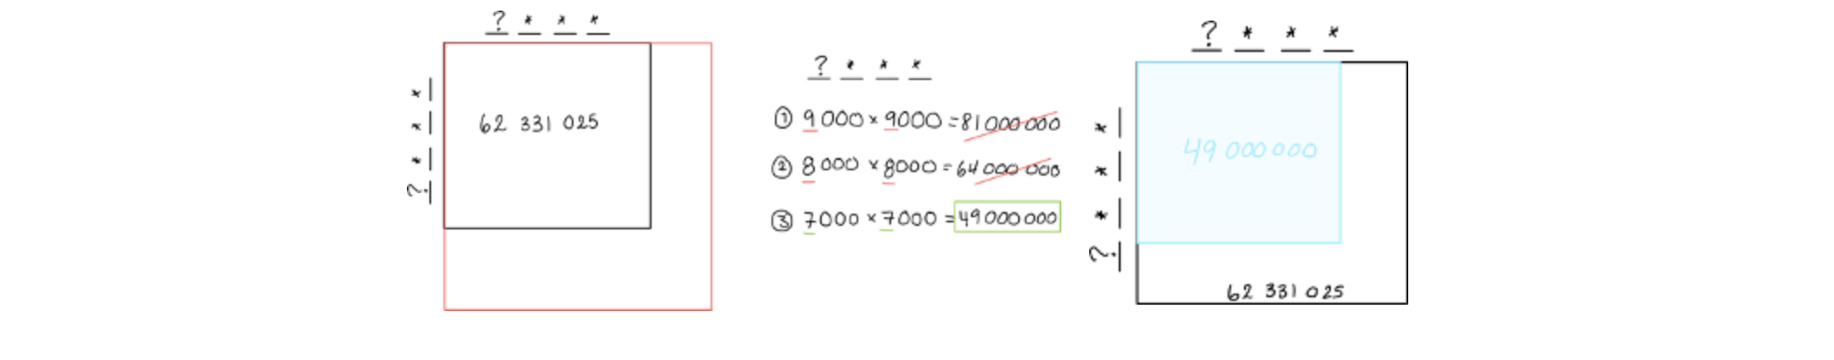

Par la suite, pour déterminer les nombres suivants avec papier-crayon, nous tentions de compléter le carré pour s'approcher le plus possible du nombre initial.

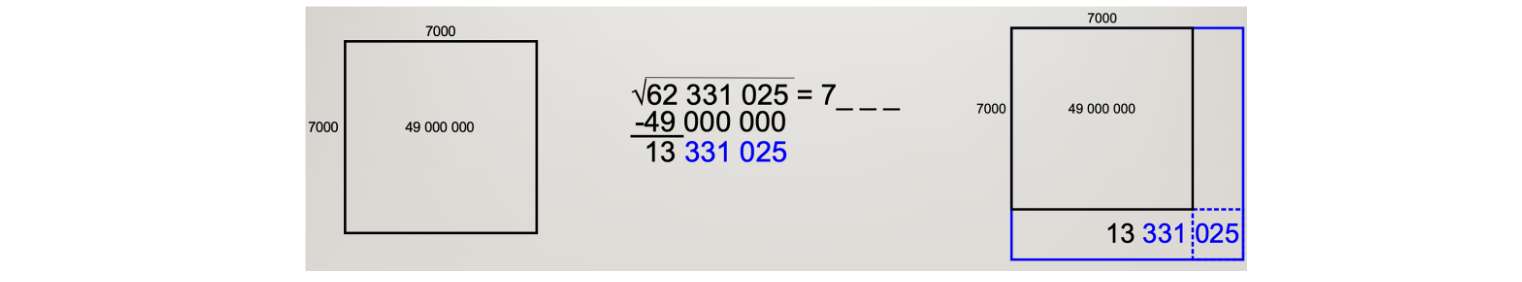

Pour l'implémentation cette stratégie m'apparaissait plus complexe, alors j'ai opté pour continuer de comparer avec mon nombre initial à chaque fois en me recréant un carré avec de nouvelles dimensions. (Je n'avais plus à me soucier que ce soit facile à calculer mentalement!)

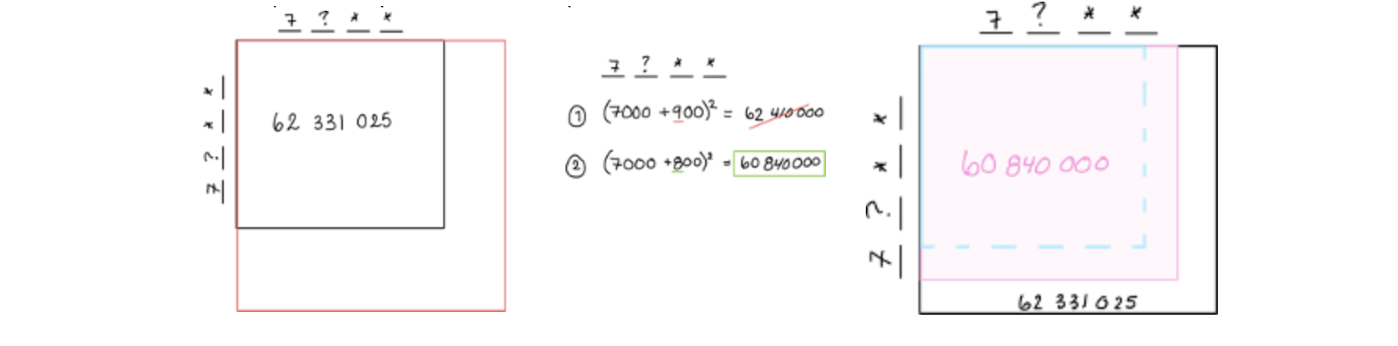


In [7]:
racine=0 #la valeur finale de la racine sera enregistrée ici (initialisation)

for i in range (paquets_deux-1, -10, -1): #je termine à -10 pour avoir 10 décimales (ce nombres pourrait changer)
    
    for j in range (9, -1, -1):
        
        racine_temporaire = (racine + j * (10 ** i))
        
        if i < 0:
            racine_temporaire = round (racine_temporaire, abs(i))
        
        #print(racine_temporaire)
        carre = (racine_temporaire) ** 2
        
        if float(carre) <= float(n):
            break
    
    racine = racine + j * 10 ** i
    
    if i < 0:
        racine = round (racine, abs(i))
    
print(racine)

349.77850134
